## Honey Production
Now that you have learned how linear regression works, let’s try it on an example of real-world data.

As you may have already heard, the honeybees are in a precarious state right now. You may have seen articles about the decline of the honeybee population for various reasons. You want to investigate this decline and how the trends of the past predict the future for the honeybees.

### Check out the Data

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
df = pd. read_csv('honeyproduction.csv')
df.head(3)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998


In [4]:
df.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07,2012.000000


####  the total production of honey per year

In [6]:
prod_per_year = df.groupby('year').totalprod.mean().reset_index()
prod_per_year = df.groupby('year').totalprod.mean().reset_index()
prod_per_year

,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06
2,2000,5.106000e+06
3,2001,4.221545e+06
4,2002,3.892386e+06
5,2003,4.122091e+06
6,2004,4.456805e+06
7,2005,4.243146e+06
8,2006,3.761902e+06
9,2007,3.600512e+06


In [7]:
# set the X-value
X = prod_per_year[['year']]
X = X.values.reshape(-1, 1)
# y_value
y = prod_per_year.totalprod

### Create and Fit a Linear Regression Model

In [8]:
regr = linear_model.LinearRegression()
regr.fit(X, y)
y_predict = regr.predict(X)

LinearRegression()

In [9]:
print(f"coeff value : {regr.coef_[0]}")
print(f"intercept of line : {regr.intercept_}")

coeff value : -88303.18915238194
intercept of line : 181208083.1073298


<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Total production of honey per year')

Text(0.5, 0, 'year')

Text(0, 0.5, 'Total Production')

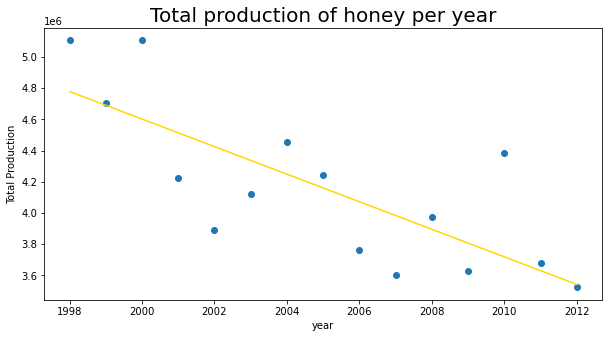

In [10]:
# scatter plot
plt.figure(figsize=(10,5))
# plot linear regression
plt.plot(X, y_predict, color='gold')
plt.scatter(X, y)
plt.title('Total production of honey per year', fontsize=20)
plt.xlabel('year')
plt.ylabel('Total Production')

### Predict the Honey Decline

So, it looks like the production of honey has been in decline, according to this linear model. Let’s predict what the year 2050 may look like in terms of honey production.

In [11]:
X_future = np.array(range(2013, 2050))
X_future = X_future.reshape(-1, 1)
future_predict = regr.predict(X_future)

X_future = np.array(range(2013, 2050))
X_future = X_future.reshape(-1, 1)
future_predict = regr.predict(X_future)

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Total production of honey per year')

Text(0.5, 0, 'year')

Text(0, 0.5, 'Total Production')

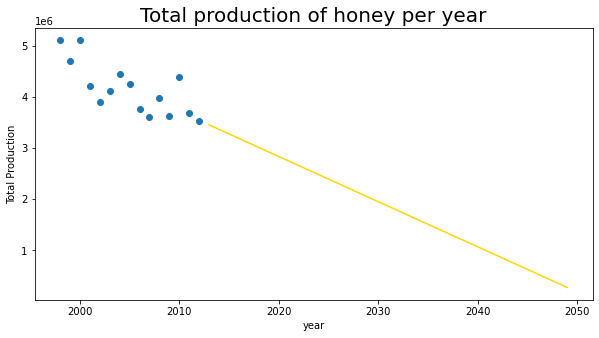

In [12]:
plt.figure(figsize=(10, 5))

plt.scatter(X, y)
plt.plot(X_future, future_predict, color='gold')

plt.title('Total production of honey per year', fontsize=20)
plt.xlabel('year')
plt.ylabel('Total Production')